# Обработка лабы

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
from scipy.interpolate import interp1d

## RC - цепь

Откроем файл:

In [2]:
RC_frame = pd.read_csv('A.csv')
RC_frame.head()

,Unnamed: 0,R,x,x0
0,0,0,-1.2,2.4
1,1,190,-0.8,2.4
2,2,380,-0.9,3.8
3,3,570,-1.3,7.7
4,4,760,-1.1,7.7


При этом $C = 0.5~мкФ$, а $r = 12.4~Ом$

In [3]:
RC_R = RC_frame.R

In [4]:
RC_R_total = RC_R + 12.4

Необходимо построить график $\psi = \arctan \left(\cfrac{1}{\Omega C R_\Sigma}\right)$, где $\Omega = 2\pi \nu$, а $\nu = 10^3~Гц$

In [5]:
RC_X = np.arctan(1/(2*np.pi*10**3 *(0.5*10**(-6)) *RC_R_total))
RC_X.head()

0    1.531860
1    1.004427
2    0.681525
3    0.500189
4    0.390898
Name: R, dtype: float64

При этом $\psi = - \cfrac{x}{x_0} \pi$

In [6]:
RC_Y = -RC_frame.x / RC_frame.x0 * np.pi
RC_Y.head()

0    1.570796
1    1.047198
2    0.744061
3    0.530399
4    0.448799
dtype: float64

Теперь можно строить график:

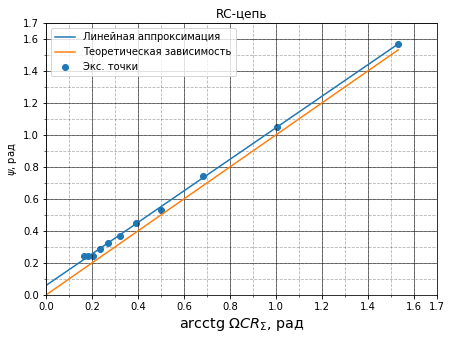

In [7]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(RC_X, RC_Y, label='Экс. точки')

RC_coefs = np.polyfit(RC_X, RC_Y, 1)
RC_Y_pred = RC_coefs[0]*RC_X + RC_coefs[1]
RC_X = RC_X.append(pd.Series([0]))
RC_Y_pred = RC_Y_pred.append(pd.Series([RC_coefs[1]]))
ax.plot(RC_X, RC_Y_pred, label='Линейная аппроксимация')

RC_Y_teor = RC_X
ax.plot(RC_X, RC_Y_teor, label='Теоретическая зависимость')

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_xlim((0, 1.7))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ylim((0, 1.7))

majc ="#3182bd"
minc ="#deebf7"

# Экстра тики!
plt.xticks(list(plt.xticks()[0]) + [1.7])
plt.yticks(list(plt.yticks()[0]) + [1.7])
ax.set_ylim((0, 1.7))
ax.set_xlim((0, 1.7))

ax.grid(True, 'minor', c='black', alpha=0.3, ls='--')
ax.grid(True, 'major', c='black', alpha=0.6, ls='-')

ax.set_xlabel(r'arcctg $\Omega C R_\Sigma$, рад', size='x-large')
ax.set_ylabel(r'$\psi$, рад')
ax.set_title(r'RC-цепь')

ax.legend()
plt.savefig('RC.pdf', fmt='pdf')
plt.show(fig)

## RL-цепь

Откроем файл:

In [8]:
RL_frame = pd.read_csv('B.csv')
RL_frame.head()

,Unnamed: 0,R,x,x0
0,0,0.0,4.0,8.2
1,1,1000.0,3.2,8.4
2,2,2000.0,2.5,8.4
3,3,3000.0,2.0,8.4
4,4,4000.0,1.7,8.4


In [9]:
RL_R = RL_frame.R

Не забудем, что $R_\Sigma = R + r + R_L$, где $R_L = \Omega L = 314~ Ом$, а $r = 12.4~Ом$

In [10]:
RL_R_total = RL_R + 12.4 + 314

Необходимо построить график $\psi = \arctan \left(\cfrac{\Omega L}{R_\Sigma}\right)$, где $\Omega = 2\pi \nu$, $\nu = 10^3 ~Гц$, $L = 50 ~мГн$

In [11]:
RL_X = np.arctan(2*np.pi*10**3 *50*10**-3 / RC_R_total)
RL_X.head()

0    1.531346
1    0.998467
2    0.675113
3    0.494686
4    0.386296
Name: R, dtype: float64

При этом $\psi = - \cfrac{x}{x_0} \pi$

In [12]:
RL_Y = -RL_frame.x / RL_frame.x0 * np.pi
RL_Y.head()

0   -1.532484
1   -1.196797
2   -0.934998
3   -0.747998
4   -0.635799
dtype: float64

Теперь можно строить график:

In [13]:
# Выбросим первую точку, она плохо аппроксимируется
RL_X = RL_X[1:]
RL_Y = RL_Y[1:]

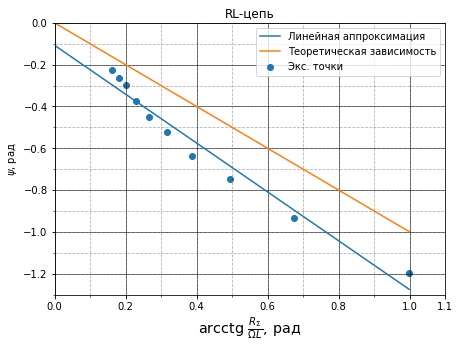

In [14]:
fig, ax = plt.subplots(figsize=(7, 5))

ax.scatter(RL_X, RL_Y, label='Экс. точки')

RL_coefs = np.polyfit(RL_X, RL_Y, 1)
RL_X = RL_X.append(pd.Series([0]))
RL_Y_pred = RL_coefs[0]*RL_X + RL_coefs[1]
#RL_Y_pred = RL_Y_pred.append(pd.Series([RL_coefs[1]]))
ax.plot(RL_X, RL_Y_pred, label='Линейная аппроксимация')

RL_Y_teor = - RL_X
ax.plot(RL_X, RL_Y_teor, label='Теоретическая зависимость')

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_xlim((0, 1.1))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))
ax.set_ylim((-1.3, 0))

ax.grid(True, 'minor', c='black', alpha=0.3, ls='--')
ax.grid(True, 'major', c='black', alpha=0.6, ls='-')

# Экстра тики!
plt.xticks(list(plt.xticks()[0]) + [1.1])
ax.set_xlim((0, 1.1))

ax.set_xlabel(r'arcctg $ \frac{R_\Sigma}{\Omega L}$, рад', size='x-large')
ax.set_ylabel(r'$\psi$, рад')
ax.set_title(r'RL-цепь')

ax.legend()
plt.savefig('RL.pdf', fmt='pdf')
plt.show(fig)

## Исследование резонансной кривой

Откроем файл:

In [15]:
RLC_frame_0 = pd.read_csv('C_0.csv')
RLC_frame_100 = pd.read_csv('C_100.csv')

In [16]:
RLC_0_v = RLC_frame_0.v
RLC_100_v = RLC_frame_100.v

Учтем, что по теории резонансная частота наступает на $\nu = 1006.6 ~Гц$.

При этом $C = 0.05 ~мкФ,~ L = 500 ~мГн,~ R_L = 332 ~Ом$

Тогда теоретическая добротность будет: $Q = \cfrac{1}{R_\Sigma} \sqrt{\cfrac{L}{C}}$

Для $R = 0 ~Ом \Rightarrow~ \boxed{Q = 9.5}$

Для $R = 100 ~Ом \Rightarrow~ \boxed{Q = 7}$

Построим графики $|\,\psi| = f(\nu\,/\nu_0)$ и поищем через него добротность по формуле $Q = \nu_0\, /(2\Delta\nu)$, где $2\Delta\nu\,/\nu_0$ --- ширина графика при $\psi = \pi\,/4$

In [17]:
%%latex
При этом $\psi = - \cfrac{x}{x_0} \pi$. Но мы будем откладывать $\cfrac{\psi}{\pi} = -\cfrac{x}{x_0}$

<IPython.core.display.Latex object>

In [18]:
RLC_v0 = 1006.6
RLC_Y_0 = np.abs(-RLC_frame_0.x / RLC_frame_0.x0)
RLC_Y_100 = np.abs(-RLC_frame_100.x / RLC_frame_100.x0)

In [19]:
RLC_X_0 = RLC_0_v/RLC_v0
RLC_X_100 = RLC_100_v/RLC_v0

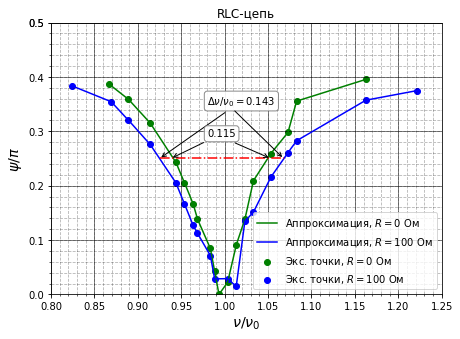

In [20]:
fig, ax = plt.subplots(figsize=(7, 5))

# ДЛЯ R = 0 ОМ
ax.scatter(RLC_X_0, RLC_Y_0, label=r'Экс. точки, $R=0$ Ом', c='g')
RLC_f_0 = interp1d(RLC_X_0, RLC_Y_0, kind='slinear')
RLC_X_pred_0 = np.linspace(np.min(RLC_X_0), np.max(RLC_X_0), 1000)
ax.plot(RLC_X_pred_0, RLC_f_0(RLC_X_pred_0), label=r'Аппроксимация, $R=0$ Ом', c='g')

# ДЛЯ R = 100 ОМ
ax.scatter(RLC_X_100, RLC_Y_100, label=r'Экс. точки, $R=100$ Ом', c='b')
RLC_f_100 = interp1d(RLC_X_100, RLC_Y_100, kind='slinear')
RLC_X_pred_100 = np.linspace(np.min(RLC_X_100), np.max(RLC_X_100), 1000)
ax.plot(RLC_X_pred_100, RLC_f_100(RLC_X_pred_100), label=r'Аппроксимация, $R=100$ Ом', c='b')


ax.xaxis.set_major_locator(MultipleLocator(0.05))
ax.xaxis.set_minor_locator(MultipleLocator(0.01))
ax.set_xlim((0.8, 1.25))
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.02))
ax.set_ylim((0, 0.45))


# ЛИНИЯ PI/4
bbox_props = dict(boxstyle="round", fc="w", ec="0.5", alpha=0.9)
ax.plot(np.linspace(0.925, 1.068, 100), [0.25]*100, c='r', ls='-.')
ax.annotate(r'$\Delta\nu/\nu_0 = 0.143$', 
            xy=(0.925, 0.25),
            xytext=(0.98, 0.35),
           arrowprops={"facecolor": "black", "arrowstyle":"->"},
           bbox=bbox_props)
ax.annotate('', 
            xy=(1.068, 0.25),
            xytext=(1.01, 0.34),
           arrowprops={"facecolor": "black", "arrowstyle":"->"})

ax.annotate(r'0.115', 
            xy=(0.938, 0.25),
            xytext=(0.98, 0.29),
           arrowprops={"facecolor": "black", "arrowstyle":"->"},
           bbox=bbox_props)
ax.annotate('', 
            xy=(1.053, 0.25),
            xytext=(1.01, 0.28),
           arrowprops={"facecolor": "black", "arrowstyle":"->"})


ax.grid(True, 'minor', c='black', alpha=0.3, ls='--')
ax.grid(True, 'major', c='black', alpha=0.6, ls='-')

plt.yticks(list(plt.yticks()[0]) + [0.5])
ax.set_ylim((0, 0.5))
ax.set_xlabel(r'$\nu/\nu_0$', size='x-large')
ax.set_ylabel(r'$\psi/\pi$', size='x-large')
ax.set_title(r'RLC-цепь')

ax.legend(loc=4)
plt.savefig('RLC.pdf', fmt='pdf')
plt.show(fig)

Получаем для $R = 100 ~Ом$ из графика $\boxed{Q = 6.99}$

Для $R = 0 ~Ом$ из графика $\boxed{Q = 8.7}$